# Objectifs

* Pour toute les étapes ci-dessous il vous est demandé d'argumenter vos choix et d'expliquer les résultats obtenus.

* Réaliser une EDA (Exploratory Data Analysis) sur le jeu de données

- Descrire les données
Réaliser une analyse univariée et bivariée
Réaliser le preprocessing des données

- Gérer les données manquantes
Procéder à la normalisation / encodage
Entrainer un modèle d'apprentissage supervisé

- Choisir un modèle répondant aux objectifs du projet
Définir les paramètres du modèle
Utiliser la validation croisée
Evaluer le modèle

- Choisir la ou les métriques d'erreur
Valider les performances obtenues
Conclure
---
- Réalisation du projet
- Difficultés
- Performance
...



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [ ]:
url = "https://raw.githubusercontent.com/remijul/dataset/master/dolphins.csv"
df = pd.read_csv(url)
df.head()

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Tropicalis,Artic,39.1,18.7,181.0,3750.0,MALE
1,Tropicalis,Artic,39.5,17.4,186.0,3800.0,FEMALE
2,Tropicalis,Artic,40.3,18.0,195.0,3250.0,FEMALE
3,Tropicalis,Artic,NaN,NaN,NaN,NaN,NaN
4,Tropicalis,Artic,36.7,19.3,193.0,3450.0,FEMALE


# EDA (Exploratory Data Analysis)

In [ ]:
df.shape

(344, 7)

In [ ]:
# Quelques informations sur le jeu de données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
# Vérifier la présence de NA dans l'ensemble de données.
df.isna().sum()

variety            0
area               0
dimension_1_mm     2
dimension_2_mm     2
dimension_3_mm     2
mass_g             2
sex               10
dtype: int64

In [ ]:
# Description statistique avec la méthode describe() : pour les données quantitatives uniquement
df.describe()

,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
# Description statistique avec la méthode describe() : pour les données qualitatives ET quantitatives
df.describe(include='all')

,variety,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Tropicalis,Caraibean,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
# Calculer la median de toutes les variables quantitatives
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


dimension_1_mm      44.45
dimension_2_mm      17.30
dimension_3_mm     197.00
mass_g            4050.00
dtype: float64

In [ ]:
# afficher le nombre de chaque catégorie de notre target
df.variety.value_counts()

Tropicalis    152
Peale         124
Chinensis      68
Name: variety, dtype: int64

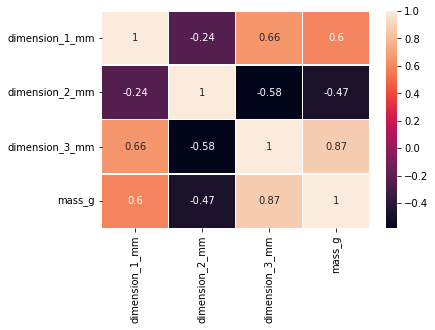

In [ ]:
# la matrice de corrélation 
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

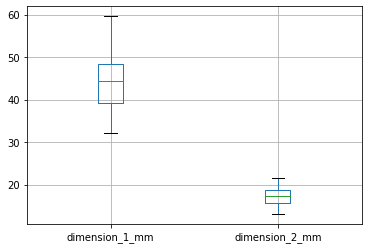

In [ ]:
df.boxplot(column=['dimension_1_mm', 'dimension_2_mm'])

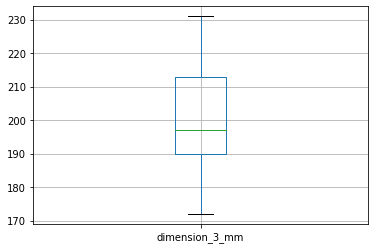

In [ ]:
df.boxplot(column='dimension_3_mm')

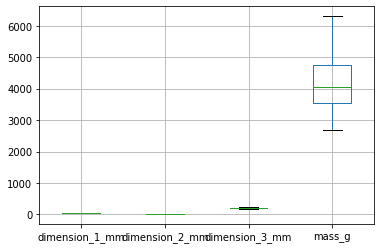

In [ ]:
df.boxplot()

- ici on voit qu'on est obligé de normaliser les données, sinon le feature **'mass_g'** va avoir un impacte bcp plus important que les autres features de notre modèle 

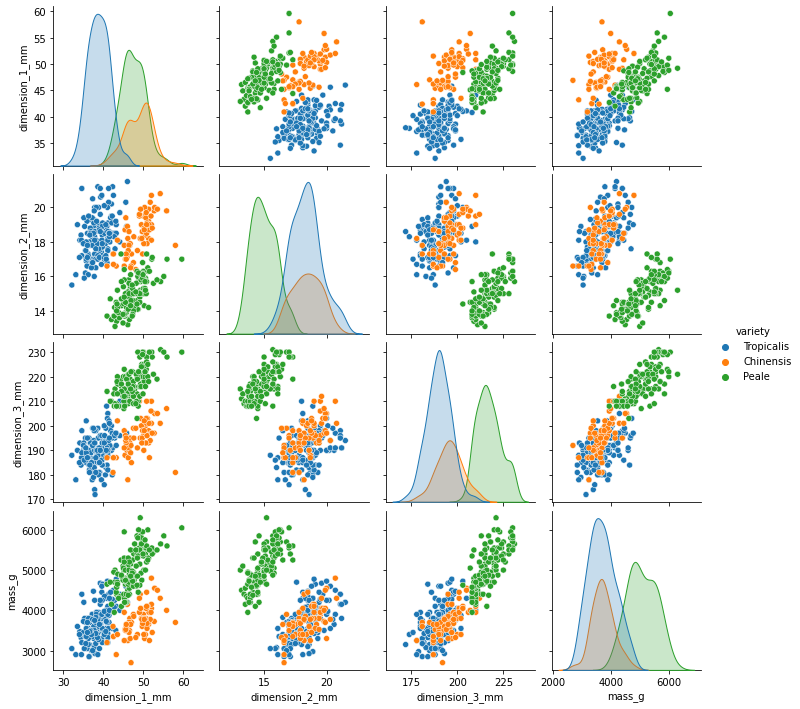

In [ ]:
# visualiser le dataset par rapport à notre target
sns.pairplot(data=df, hue='variety')

-on peut dire que la catégorie **'Peale'** se distincte plus que les duex autres catégories qui ont un peu plus tendance a se trouves dans les memes zones


- une autre façon de visualiser chaque catégorie de notre target avec des variables quantitatives 

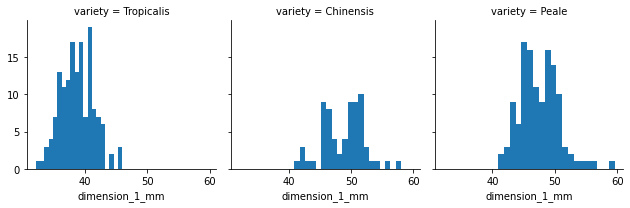

In [ ]:
g = sns.FacetGrid(df, col='variety')
g.map(plt.hist, 'dimension_1_mm', bins=20)

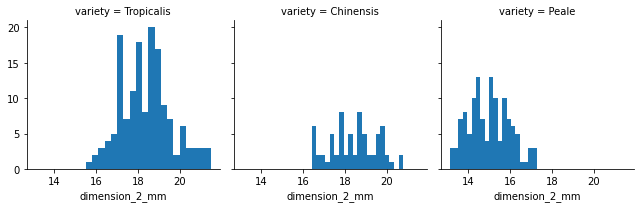

In [ ]:
g = sns.FacetGrid(df, col='variety')
g.map(plt.hist, 'dimension_2_mm', bins=20)

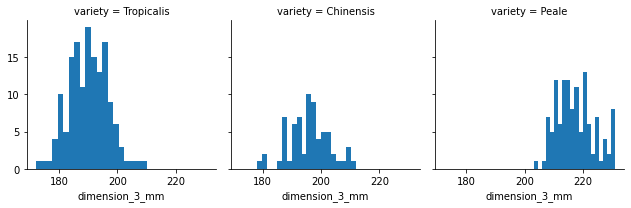

In [ ]:
g = sns.FacetGrid(df, col='variety')
g.map(plt.hist, 'dimension_3_mm', bins=20)

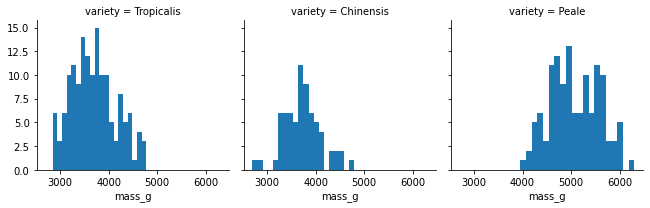

In [ ]:
g = sns.FacetGrid(df, col='variety')
g.map(plt.hist, 'mass_g', bins=20)

# Preprocessing

- on va commencer par separer notre dataset en target (y) et feature (X)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   variety         344 non-null    object 
 1   area            344 non-null    object 
 2   dimension_1_mm  342 non-null    float64
 3   dimension_2_mm  342 non-null    float64
 4   dimension_3_mm  342 non-null    float64
 5   mass_g          342 non-null    float64
 6   sex             334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
y = df['variety']
X = df.drop('variety', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)


- nos features on les separe en Categorical et Numerical

In [ ]:
numerical_features = ['dimension_1_mm', 'dimension_2_mm', 'dimension_3_mm','mass_g']
categorical_features = ['area', 'sex']

- on va créer un pipeline pour les Numericals où on utilise SimpleImputer pour les données manquantes (on va les imputer la valeur moyenne) et ensuite on va faire un StandardScaler 
- pour les Categorical on va imputer la valeur le plus frequente, et ensuite on utilise OneHotEncoredre.

In [ ]:
numerical_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())

In [ ]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                   (categorical_pipeline, categorical_features))

# Création du modèle

- je vais utiliser plusieurs modèles pour trouver celui qui a le meilleur taux de precision

In [ ]:
# SGDClassifier()
model = make_pipeline(preprocessor, SGDClassifier())

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [ ]:
# LogisticRegression
model = make_pipeline(preprocessor, LogisticRegression(random_state=42))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9883720930232558

In [ ]:
# KNeighborsClassifier
model = make_pipeline(preprocessor, KNeighborsClassifier(3))

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9767441860465116

In [ ]:
# DecisionTreeClassifier
model = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5, random_state=42))

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

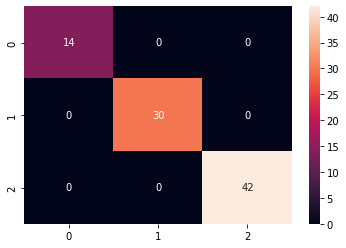

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, fmt="d")

In [ ]:
# RandomForestClassifier
model = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))

model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'randomforestclassifier__n_estimators': [int(x) for x in np.linspace(start = 5, stop = 20, num = 5)],
               'randomforestclassifier__max_features': ['auto', 'sqrt'],
               'randomforestclassifier__max_depth': [2,4],
               'randomforestclassifier__min_samples_split': [2, 3, 4],
               'randomforestclassifier__min_samples_leaf': [1, 2,3]}

grid = GridSearchCV(model, param_grid=params, cv=5)

grid.fit(X_train, y_train)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/metaestimators.py", line 113, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)  # noqa
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 707, in score
    Xt = transform.transform(Xt)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/compose/_co

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['dimension_1_mm',
                                                                          'dimension_2_mm',
                                                                          'dimension_3_mm',
                                                                          'mass_g']),
                                     

In [ ]:
grid.best_params_

{'randomforestclassifier__max_depth': 2,
 'randomforestclassifier__max_features': 'auto',
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__min_samples_split': 2,
 'randomforestclassifier__n_estimators': 5}

In [ ]:
grid.score(X_test, y_test)

0.9767441860465116

In [ ]:
y_predRF = grid.predict(X_test)

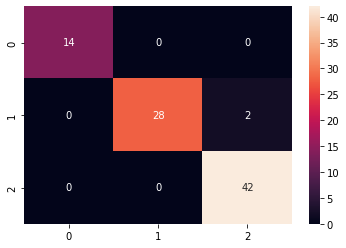

In [ ]:
cf_matrix = confusion_matrix(y_test, y_predRF)

ax = sns.heatmap(cf_matrix, annot=True, fmt="d")

## Test avec un sujet modifié 
- on va modifié un peu les donnée d'un **Chinensis** pour voir qu'est ce que notre modèle va prédire 
- les données sont : Pacific,	50.9,	17.9,	196.0,	3675.0,	FEMALE

In [ ]:
d = {'area': 'Pacific', 
     'dimension_1_mm': [53.3],
     'dimension_2_mm': [19.0],
     'dimension_3_mm': [195.0],
     'mass_g': [3660.0],
     'sex': 'FEMALE' }
df_test = pd.DataFrame(data=d)
df_test

,area,dimension_1_mm,dimension_2_mm,dimension_3_mm,mass_g,sex
0,Pacific,53.3,19.0,195.0,3660.0,FEMALE


In [ ]:
grid.predict(df_test)

array(['Chinensis'], dtype=object)

# Conclution 

Avec tous les modèles que j'ai utilisé pour ce projet, j'obtiens un score très éléve mais les deux modèles qui donne un score totale de 100% sont **DecisionTreeClassifier** et **RandomForestClassifier**
